<a href="https://colab.research.google.com/github/dinann1990/Zenius/blob/main/Assessment_1_Perdinan_Daud_Panggabean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assessment 1**

source : https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?resource=download&select=GlobalLandTemperaturesByState.csv

# **Import Library**


---


> Meng*import* *library* yang nantinya diperlukan dalam menjalankan sebuah syntax, *library* ada banyak macamnya, namun dalam Assessment 1, saya menggunakan ; `Pandas, Numpy, Matplotlib.Pyplot, Seaborn, Plotly.Express, Plotly.Figure_Factory, dan Scipy` yang diinisialkan untuk menjalankan syntax nantinya.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import scipy as sp

# **Import Dataset**


---


> Meng*import* data melalui local storage berbentuk .csv(excel) dan mengetahui apakah datatype dari dataset bertipe ; `text`, `numeric`, `sequences` atau `set`.



In [ ]:
#import dataset global temperature by state
from google.colab import files
uploades = files.upload()

Saving GlobalLandTemperaturesByState.csv to GlobalLandTemperaturesByState.csv


In [ ]:
#name dataset global temperature by state
df_state = pd.read_csv('GlobalLandTemperaturesByState.csv',sep=",")
df_state.columns = map(str.lower, df_state.columns)
df_state

,dt,averagetemperature,averagetemperatureuncertainty,state,country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


In [ ]:
#checking data types
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   averagetemperature             620027 non-null  float64
 2   averagetemperatureuncertainty  620027 non-null  float64
 3   state                          645675 non-null  object 
 4   country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB


In [ ]:
#change data type from object to date
df_state = pd.read_csv('GlobalLandTemperaturesByState.csv',parse_dates=['dt'])
df_state.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
State                                    object
Country                                  object
dtype: object

# **Filter Datasets**
---
filtering data from 2008 - 2013

> Dikarenakan data yang berkapasitas besar, maka perlu dilakukan filtering datasets dengan hanya mengambil data berdasarkan tahun 2008 sampai 2013 untuk diolah nantinya dalam visualisasi data.




In [ ]:
#filter data to 2008 - 2013
df_state_lim = df_state[df_state.dt >= '2008-01-01']
df_state_lim.columns = map(str.lower, df_state_lim.columns)
df_state_lim

,dt,averagetemperature,averagetemperatureuncertainty,state,country
1832,2008-01-01,25.750,0.318,Acre,Brazil
1833,2008-02-01,25.877,0.191,Acre,Brazil
1834,2008-03-01,25.759,0.181,Acre,Brazil
1835,2008-04-01,25.721,0.244,Acre,Brazil
1836,2008-05-01,24.882,0.285,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


# **Cleaning Datasets**
---
> Data yang sudah di filter kemudian perlu dilihat `#missingvalue`(kekosongan) nya untuk *data cleaning*, di dapat melalui syntax bahwa dataset 2008-2013 memiliki `#missingvalue`(kekosongan) pada data averagetemperature dan averagetemperatureuncertainty sebanyak 181 data. `#Missingvalue`(kekosongan) ini akan menjadi kejanggalan dalam interpretasi visual, maka dari itu perlu dilakukan *cleaning data* untuk bisa diolah ke interpretasi visual (*Data Visualization*)




In [ ]:
#missing data value
df_state_lim.isnull().any()
df_state_lim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16629 entries, 1832 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             16629 non-null  datetime64[ns]
 1   averagetemperature             16448 non-null  float64       
 2   averagetemperatureuncertainty  16448 non-null  float64       
 3   state                          16629 non-null  object        
 4   country                        16629 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 779.5+ KB


In [ ]:
#how many the missing value from dataset
df_state_lim.isna().sum()

dt                                 0
averagetemperature               181
averagetemperatureuncertainty    181
state                              0
country                            0
dtype: int64

## *data cleaning*

In [ ]:
#missing data in df_state_lim
df_state_lim.loc[:,'month'] = df_state_lim['dt'].dt.month
average_tmp_imp = df_state_lim.groupby(['state','month'])['averagetemperature'].mean().to_dict()
#impute missing values with average temperature of the month
df_state_lim.loc[:,'averagetemperature'] = df_state_lim.apply(lambda x: average_tmp_imp[(x['state'],x['month'])] if np.isnan(x['averagetemperature']) else x['averagetemperature'],axis=1)

In [ ]:
average_tmp_imp = df_state_lim.groupby(['state','month'])['averagetemperatureuncertainty'].mean().to_dict()
#impute missing values with average temperature of the month
df_state_lim.loc[:,'averagetemperatureuncertainty'] = df_state_lim.apply(lambda x: average_tmp_imp[(x['state'],x['month'])] if np.isnan(x['averagetemperatureuncertainty']) else x['averagetemperatureuncertainty'],axis=1)

In [ ]:
df_state_lim

,dt,averagetemperature,averagetemperatureuncertainty,state,country,month
1832,2008-01-01,25.7500,0.3180,Acre,Brazil,1
1833,2008-02-01,25.8770,0.1910,Acre,Brazil,2
1834,2008-03-01,25.7590,0.1810,Acre,Brazil,3
1835,2008-04-01,25.7210,0.2440,Acre,Brazil,4
1836,2008-05-01,24.8820,0.2850,Acre,Brazil,5
...,...,...,...,...,...,...
645670,2013-05-01,21.6340,0.5780,Zhejiang,China,5
645671,2013-06-01,24.6790,0.5960,Zhejiang,China,6
645672,2013-07-01,29.2720,1.3400,Zhejiang,China,7
645673,2013-08-01,29.2020,0.8690,Zhejiang,China,8


Setelah melakukan *cleaning dataset*, maka sudah tidak ada `#missingvalue` (kekosongan) dalam data yang kemudian siap diolah untuk interpretasi visual (*Data Visualization*)

@# **Data Categorical**
---
> Diisi dengan syntax untuk mengetahui tiap variabel dari dataset apakah berbentuk numerical atau categorical(text/string)



In [ ]:
#count numerical and categorical data
num_cols = df_state_lim._get_numeric_data().columns
cat_cols = list(set(df_state_lim.columns) - set(num_cols))
print("Numerical columns: ",num_cols)
print("Categorical columns: ",cat_cols)

Numerical columns:  Index(['averagetemperature', 'averagetemperatureuncertainty', 'month'], dtype='object')
Categorical columns:  ['state', 'country', 'dt']


# **Data Visualization**

### barplot, distplot, boxplot, scatterplot, and pie chart


##### **barplot based on countries proportion (%)**

> menunjukkan kedudukan persentase proporsi dari tiap negara dalam bentuk tabel, kemudian tabel direpresentasikan dalam bentuk visualisasi data barplot dan distplot.
.


In [ ]:
df_tmp = df_state_lim.country.value_counts(normalize=True).to_frame().reset_index()

In [ ]:
df_tmp=df_tmp.rename(columns={"index":"Country","country":"Percent"})

In [ ]:
df_tmp

,Country,Percent
0,Russia,0.369295
1,United States,0.211618
2,India,0.141079
3,China,0.128631
4,Brazil,0.066390
5,Canada,0.049793
6,Australia,0.033195


In [ ]:
df_tmp_p = df_state_lim.country.value_counts(normalize=True).to_frame().reset_index()
df_tmp_p=df_tmp_p.rename(columns={"index":"Country","country":"Percent"})
df_tmp_p

,Country,Percent
0,Russia,0.369295
1,United States,0.211618
2,India,0.141079
3,China,0.128631
4,Brazil,0.066390
5,Canada,0.049793
6,Australia,0.033195


### barplot using plotly.express

### **Interpretasi Barplot Countries Based on Proportion**
---
> Berdasarkan representasi visualisasi grafis barplot (vertikal dan horizontal), dapat disimpulkan bahwa selama periode 2008-2013, Russia menjadi negara yang paling sering muncul dalam dataset yang tersedia, dengan persentase sekitar 36.9295%. Di sisi lain, Australia merupakan negara dengan kemunculan terendah, mencatatkan nilai sekitar 3.33195%.




In [ ]:
# create barplot (vertikal):country to averagetemperature
bar_ver = px.bar(df_tmp, x='Country', y='Percent', color='Country', title='Distribution of Countries in The Dataset')
bar_ver

In [ ]:
# create barplot (horizontal):country to averagetemperature
bar_hor = px.bar(df_tmp, x='Percent', y='Country',color='Country', orientation='h', title='Distribution of Countries in the Dataset')
bar_hor

### **barplot based on countries to highest averagetemperature**

> menunjukkan kedudukan proporsi dari tiap negara dalam bentuk tabel dengan "*averagetemperature* tertinggi" sebagai taraf dalam pengukuran data, kemudian tabel direpresentasikan dalam bentuk visualisasi data barplot dan distplot.



In [ ]:
df_tmp_max = df_state_lim.groupby("country")['averagetemperature'].max().to_frame().reset_index()

In [ ]:
df_tmp_max

,country,averagetemperature
0,Australia,32.214
1,Brazil,29.431
2,Canada,20.603
3,China,30.020
4,India,36.339
5,Russia,29.501
6,United States,32.200


### **Interpretasi Barplot based on Countries to Highest averagetemperature**
---
> Berdasarkan representasi barplot (vertikal dan horizontal) dapat disimpulkan bahwa dalam rentang tahun 2008-2013, India mencatat suhu rata-rata maksimum yang paling tinggi, yakni sekitar 36.339 derajat Celsius. Dengan sebaliknya, Canada memiliki suhu rata-rata maksimum terendah, dengan nilai sekitar 20.603 derajat Celsius.



In [ ]:
# create barplot (horizontal): the highest state that has maximum temperature
bar_hor_max=px.bar(df_tmp_max, y='averagetemperature', x='country',color='country', title='Maximum Average Temperature by State')
bar_hor_max

In [ ]:
# create barplot (vertical): the highest state that has maximum temperature
bar_ver_max=px.bar(df_tmp_max, y='country', x='averagetemperature',color='country', orientation='h', title='Maximum average temperature by country')
bar_ver_max

### displot using seaborn

### **Interpretasi Distplot averagetemperature**
---
> Berdasarkan representasi grafis distplot distribusi data condong ke arah kiri atau memiliki skewness negatif, dengan nilai skewness yang kurang dari 0. Oleh karena itu, dapat disimpulkan bahwa variabel suhu rata-rata memiliki modus yang lebih besar dibandingkan dengan nilai mean, dan distribusi data ini masih dapat dianggap normal karena nilai skewnessnya berada dalam rentang -2 hingga 2.









In [ ]:
sns.set()

In [ ]:
print(sp.stats.skew(df_state_lim.averagetemperature, axis=0, bias=True))

-0.7348708666806014


<ipython-input-27-2f26fff5c74f>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




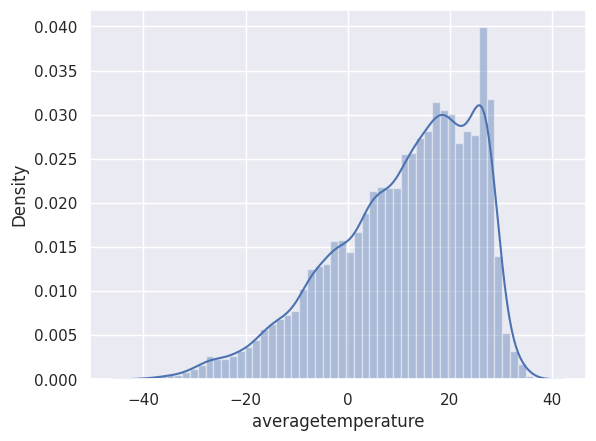

In [ ]:
distplot = sns.distplot(df_state_lim.averagetemperature)

### **Interpretasi Distplot averagetemperatureuncertainty**
---

> Berdasarkan representasi grafis distplot distribusi data condong ke arah kanan atau memiliki skewness positif, dengan nilai skewness yang lebih dari 0. Oleh karena itu, dapat disimpulkan bahwa variabel suhu rata-rata ketakpastian memiliki modus yang lebih kecil dibandingkan dengan nilai mean, dan distribusi data ini mengindikasikan adanya ekstrem asimetri dalam distribusi data, skewness sangat tinggi dapat terjadi jika terdapat outlier atau anomali yang sangat besar dalam data, yang dapat "menarik" ekor distribusi ke arah tertentu, maka dari itu perlu dilakukan perhitungan lebih lanjut dalam perhitungan statistiknya.



In [ ]:
print(sp.stats.skew(df_state_lim.averagetemperatureuncertainty, axis=0, bias=True))

5.282597499055148


<ipython-input-29-37415c44e5b8>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




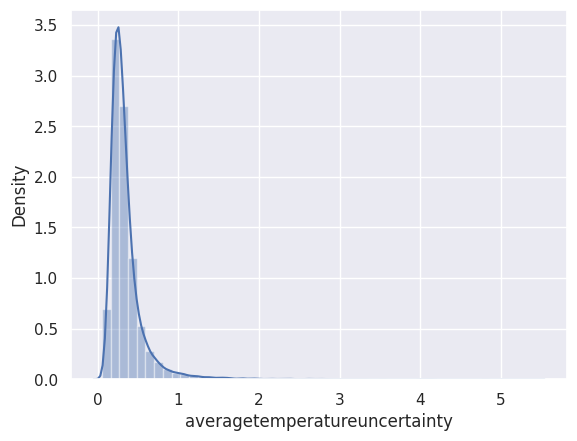

In [ ]:
distplot = sns.distplot(df_state_lim.averagetemperatureuncertainty)

### boxplot using plotly.express

### **Interpretasi Boxplot based on Country to averagetemperature**
---
>Berdasarkan visualisasi boxplot, terlihat bahwa Brazil, Rusia, Amerika Serikat, Kanada, India, dan China memiliki nilai median mendekati ujung atas dan ekor distribusi yang lebih panjang di sisi bawah. Oleh karena itu, dapat diambil kesimpulan bahwa distribusi data cenderung condong ke kiri (skewness negatif). Di sisi lain, Australia memiliki median yang dekat dengan ujung bawah dan ekor distribusi yang lebih panjang di sisi atas. Sehingga, dapat disimpulkan bahwa distribusi data cenderung condong ke kanan (skewness positif) untuk Australia. Box plot juga menunjukkan adanya banyak outlier pada bagian bawah atau sebelah kiri distribusi untuk Brazil, Rusia, Amerika Serikat, India, dan China. Hal ini mengindikasikan bahwa data tersebut tidak mengikuti pola distribusi normal, dan hasil analisisnya kemungkinan akan cenderung bias.








In [ ]:
#import boxplot based on country to averagetemperature
boxplot = px.box(df_state_lim,x = 'country',y = 'averagetemperature',title = 'Temperature in Each Country',color='country')
boxplot

### **Interpretasi Boxplot based on Month to averagetemperature**
---
> Berdasarkan visualisasi boxplot, terlihat bahwa rata-rata tiap bulan dalam 1 tahun memiliki median yang dekat dengan ujung bawah dan ekor distribusi yang lebih panjang di sisi atas. Sehingga, dapat disimpulkan bahwa distribusi data cenderung condong ke kanan (skewness positif). Box plot juga menunjukkan adanya banyak outlier pada bagian bawah atau sebelah kiri distribusi untuk bulan ke-4, ke-5, ke-7 dan ke-11. Hal ini mengindikasikan bahwa data tersebut tidak mengikuti pola distribusi normal, dan hasil analisisnya kemungkinan akan cenderung bias.



In [ ]:
#import boxplot based on month to averagetemperature
boxplot_mo = px.box(df_state_lim,x = 'month',y = 'averagetemperature',title = 'Temperature in Each Month',color='month')
boxplot_mo

### scatterplot using plotly.express

### **Interpretasi Scatterplot based on averagetemperatureuncertainty to averagetemperature**
---
> Berdasarkan hasil representasi grafis scatterplot terlihat bahwa data cenderung mengelompok di suatu area tertentu. Oleh karena itu, dapat disarankan bahwa tidak ada hubungan linier yang jelas antara kedua variabel tersebut. Selain itu, terlihat adanya titik-titik data yang berbeda secara signifikan, menunjukkan bahwa distribusi data tidak mengikuti pola yang biasa (tidak normal).



In [ ]:
#import scatterplot based on averagetemperatureuncertainty to averagetemperature
scat_avgtmp = px.scatter(df_state_lim,x = 'averagetemperature',y = 'averagetemperatureuncertainty', color='country', title='Correlation between averagetemperature and averagetemperatureuncertainty')
scat_avgtmp

### **Interpretasi Scatterplot based on Month to averagetemperature**
---
> Berdasarkan hasil representasi scatterplot terlihat bahwa data dengan data numeric antar tiap bulan nya dengan rata-rata temperature cenderung menunjukkan garis linear tiap bulan nya oleh tiap negara. Oleh karena itu, dapat disarankan bahwa ada hubungan linier yang jelas antara kedua variabel tersebut. Selain itu, terlihat pada beberapa bulan adanya titik-titik data yang berbeda secara signifikan, menunjukkan bahwa distribusi data tidak mengikuti pola yang biasa (tidak normal).



In [ ]:
#import scatterplot based on month to averagetemperature
scat_m = px.scatter(df_state_lim,x = 'month',y = 'averagetemperature', color='country', title='Correlation between month and averagetemperaturey')
scat_m

### **Interpretasi Scatterplot based on Month to averagetemperatureuncertainty**
---
> Berdasarkan hasil representasi scatterplot terlihat bahwa data dengan data numeric antar tiap bulan nya dengan rata-rata temperature ketakpastian cenderung menunjukkan garis linear tiap bulan nya oleh tiap negara. Oleh karena itu, dapat disarankan bahwa ada hubungan linier yang jelas antara kedua variabel tersebut. Selain itu, terlihat pada selain bulan ke-8 adanya titik-titik data yang berbeda secara signifikan, menunjukkan bahwa distribusi data tidak mengikuti pola yang biasa (tidak normal).




In [ ]:
#import scatterplot based on month to averagetemperaturecertainty
scat_mta = px.scatter(df_state_lim,x = 'month',y = 'averagetemperatureuncertainty', color='country', title='Correlation between month and averagetemperatureuncertainty')
scat_mta

### pie chart using matplotlib.pyplot

### **Interpretasi Pie Chart for Country based on Proportion**
---
> Berdasarkan hasil representasi diagram pie chart terlihat bahwa dalam periode 2008-2013, Russia mendominasi dalam daftar negara yang tersedia dengan persentase terbesar, yakni sekitar 36.93%. Sebaliknya, Australia memiliki persentase terendah, yaitu sekitar 3.32%.



In [ ]:
#import labels and values for pie chart country based on proportion
labels = df_tmp_p['Country']
values = df_tmp_p['Percent']
explode = [0.1, 0, 0, 0, 0, 0, 0.1]

(-1.25, 1.25, -1.25, 1.25)

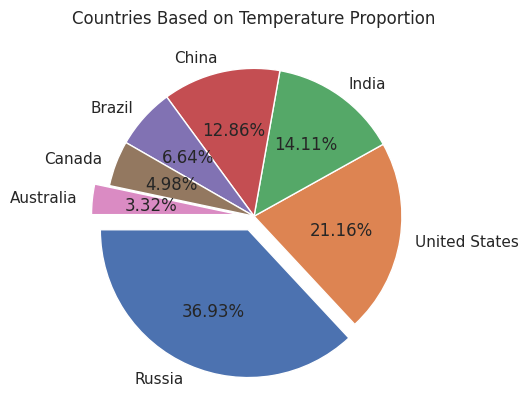

In [ ]:
# import piechart averagetemperature by country based on proportion (%)
# pie chart with explode russia as the highest proportion and australia as lowest proportion
pie_prop = plt.pie(values, labels=labels, autopct='%1.2f%%', startangle=180,explode=explode, shadow=False)
pie_prop = plt.title('Countries Based on Temperature Proportion')
pie_prop = plt.axis()
pie_prop

### **Interpretasi Pie Chart for Country based on Highest averagetemperature**

> Berdasarkan hasil representasi diagram pie chart terlihat bahwa dalam periode 2008-2013, India mendominasi dalam daftar negara dengan rata-rata suhu tertinggi sebagai taraf ukur dengan persentase terbesar, yakni sekitar 17.28%. Sebaliknya, Canada memiliki persentase terendah, yaitu sekitar 9.80%.




In [ ]:
#import labels and values for pie chart country based on highest avgtemp
labels = df_tmp_max['country']
values = df_tmp_max['averagetemperature']
explode = [0, 0, 0.1, 0, 0.1, 0, 0]

(-1.25, 1.25, -1.25, 1.25)

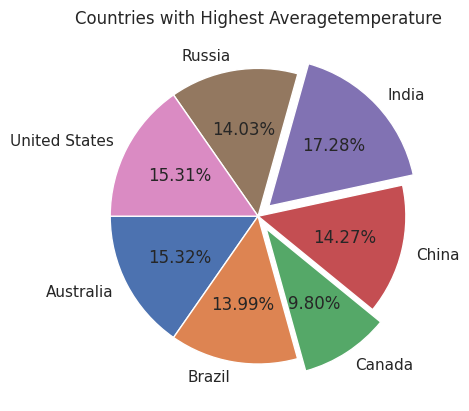

In [ ]:
# pie chart with explode India as the highest avgtemperature (%)
# pie chart with explode india as the highest proportion and canada as lowest proportion
pie_prop = plt.pie(values, labels=labels, autopct='%1.2f%%', startangle=180,explode=explode, shadow=False)
pie_prop = plt.title('Countries with Highest Averagetemperature')
pie_prop = plt.axis()
pie_prop